In [222]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from scipy.optimize import curve_fit
from scipy import stats
from IPython.display import display
from pandas.plotting import scatter_matrix



In [223]:
#Loading the data
rawData = 'diabetic_data/diabetic_data/diabetic_data.csv'
rawData2 = 'diabetic_data/diabetic_data/icd_codes.csv'
icdCodes = pd.read_csv(rawData2)
df = pd.read_csv(rawData)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [224]:
#Shows the shape of the dataset
df.shape

(101766, 50)

In [225]:
#replacing the missing values with numpy.NaN
df_2 = df.replace('?', np.NaN)
df_2

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [226]:
#Dropping all coloumns with more than 50% NaN values
emptyy = pd.DataFrame(df_2, columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'])

percentage = 50
min_count =  int(((100-percentage)/100)*emptyy.shape[0] + 1)
df_3 = emptyy.dropna( axis=1, thresh=min_count)

df_3

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [227]:
#Drop columns with more than 95% repeated values

columns = []
percentage_to_drop = 0.95 #define the percentage criterion for drop
for cols in df_3.columns:
    counter = df_3[cols].value_counts().reset_index()
    counter['drop_percentage'] = counter[cols]/df_3.shape[0]
    counter['drop_criterion']  = counter['drop_percentage'] > percentage_to_drop
    if True in counter.drop_criterion.values:
        columns.append(cols)
df_4 = df_3.drop(columns= columns,axis=1)
df_4

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [228]:
#Transforming age to be the middle value
df_5 = df_4
df_5['age'] = df_5.age.str.extract('(\d+)-(\d+)').astype('int').mean(axis=1).astype('int').round(0)

df_5

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [229]:
#Replace missing values in diag_1, diag_2, and diag_3 to 0
df_5['diag_1'].fillna(0,inplace=True)
df_5['diag_2'].fillna(0,inplace=True)
df_5['diag_3'].fillna(0,inplace=True)

df_5

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [230]:
#Drop all rows with missing values
df_6 = df_5.dropna()
df_6


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75,2,6,7,6,MC,...,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85,1,13,7,3,MC,...,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75,1,22,7,8,MC,...,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75,3,6,1,3,MC,...,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [231]:
#Shows columns that are ints and objects
df_6.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int32
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone       

In [232]:
#Dataframe of numerical features

df_7 = df_6.select_dtypes(include= [np.number])
df_7


,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
20446,72091308,20123568,75,1,22,7,7,58,2,15,0,0,0,9
20737,72848634,20377854,65,2,1,1,3,59,3,11,0,0,0,6
20824,73062156,20408121,95,1,1,7,4,56,1,9,0,0,0,6
21083,73731852,20542797,75,1,2,7,10,68,1,18,0,0,0,6
23879,81355914,7239654,75,1,3,6,12,77,5,19,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,75,2,6,7,6,46,5,14,0,0,1,9
101743,443793668,47293812,85,1,13,7,3,45,0,26,1,0,1,9
101747,443804570,33230016,75,1,22,7,8,51,6,19,0,0,0,9
101749,443816024,106392411,75,3,6,1,3,27,1,29,0,1,0,9


In [233]:
#List of columns with numerical features
numList = [col for col in df_7.columns]
numList

['encounter_id',
 'patient_nbr',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [234]:
#Dataframe of categorical features
df_8 = df_6.select_dtypes(include= [np.object])
df_8

,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,Caucasian,Female,MC,Orthopedics-Reconstructive,821,276,285,None,None,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,Caucasian,Female,MC,Nephrology,V56,403,599,None,None,No,No,No,No,No,No,Steady,No,Yes,NO
20824,Caucasian,Female,MC,Emergency/Trauma,532,428,535,None,None,No,Steady,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,MC,InternalMedicine,682,427,276,None,None,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,Caucasian,Female,UN,InternalMedicine,238,250.02,733,None,>8,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,MC,Emergency/Trauma,575,577,250,None,Norm,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,Caucasian,Male,MC,Emergency/Trauma,486,276,428,None,None,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,Caucasian,Female,MC,InternalMedicine,410,311,250,None,>7,No,No,No,No,No,No,Steady,No,Yes,>30
101749,Caucasian,Female,MC,Orthopedics,715,401,250,None,Norm,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [235]:
#List of columns with categorical features
catList = [col for col in df_8.columns]
catList

['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [236]:
#Identify outliers in numerical columns and remove them
#Check on this
for col in df_6.select_dtypes(include= np.number):
#     factor = 3
#     upper_lim = df_6[col].mean () + (df_6[col].std () * factor) 
#     lower_lim = df_6[col].mean () - (df_6[col].std () * factor)
#     df_9 = df_6[(df_6[col] < upper_lim) & (df_6[col] > lower_lim)]   
    mean = np.mean(df_6[col])
    std = np.std(df_6[col])
    df_9 = df_6[(df_6[col] > mean-(3*std)) & (df_6[col] < mean+(3*std))]


df_9.shape

# df_9 = df_7[(np.abs(stats.zscore(df_7)) < 3).all(axis=1)]
# df_9.shape

#df_10 = df_6[(np.abs(stats.zscore(df_6)) < 3).all(axis=1)]


(27098, 33)

In [237]:
#Remove duplicates in the column patient_nbr
df_10 = df_9.drop_duplicates('patient_nbr')
df_10.shape

(19696, 33)

In [238]:
#Data exploration Hint 3
df_10["readmitted"].replace({"NO": "0", ">30": "1", "<30":"1"}, inplace=True)
df_10

C:\Users\sufya\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,0
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,0
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,0
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,0
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101688,443119916,34751961,Caucasian,Male,25,1,1,7,4,SP,...,No,No,No,No,No,No,Up,Ch,Yes,0
101710,443207210,30370995,Other,Female,35,2,1,7,3,MD,...,Steady,No,No,No,No,No,Steady,Ch,Yes,0
101716,443237558,93806559,Other,Male,75,2,3,7,8,SP,...,No,No,No,No,No,No,Down,Ch,Yes,0
101720,443266892,180189752,Caucasian,Male,55,2,1,7,5,BC,...,No,Up,No,No,Steady,No,Down,Ch,Yes,1


<AxesSubplot:xlabel='age,readmitted'>

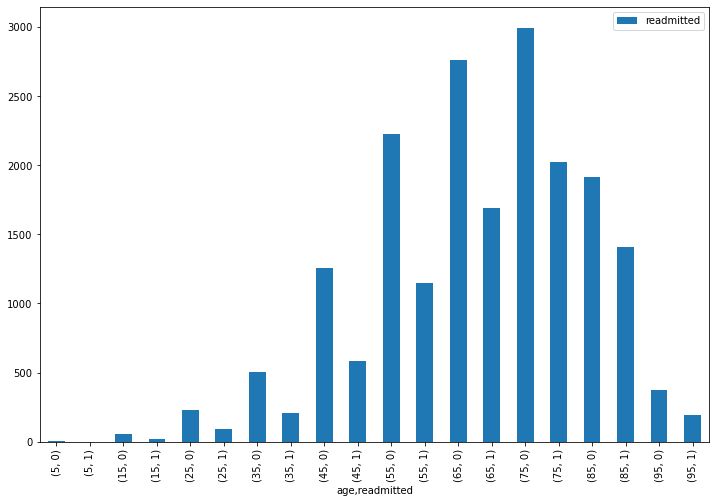

In [239]:
#Age impact on readmissions

df_11 = pd.DataFrame(df_10.groupby("age")["readmitted"].value_counts())
#df_11
#df_11 = df_10.groupby("age")["readmitted"].value_counts()

df_11.plot.bar(figsize=(12, 8))

<AxesSubplot:xlabel='race,readmitted'>

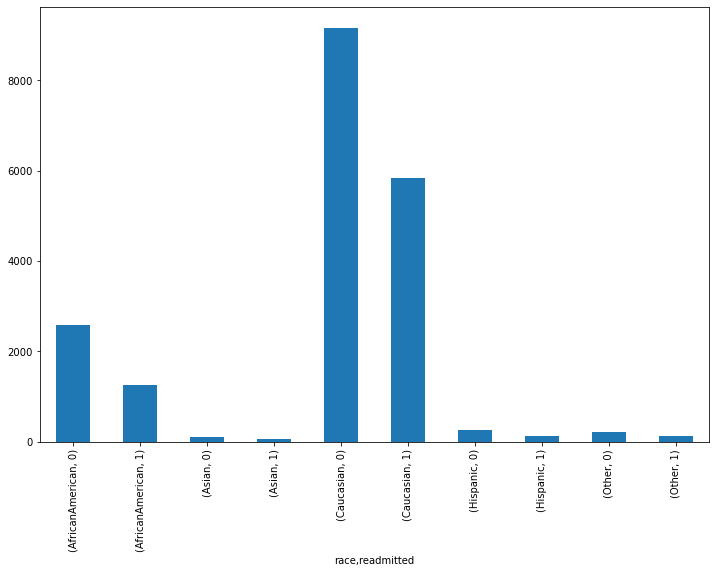

In [240]:
#Race impact on readmissions

df_12 = df_10.groupby("race")["readmitted"].value_counts()
df_12.plot.bar(figsize=(12, 8))

<AxesSubplot:xlabel='gender,readmitted'>

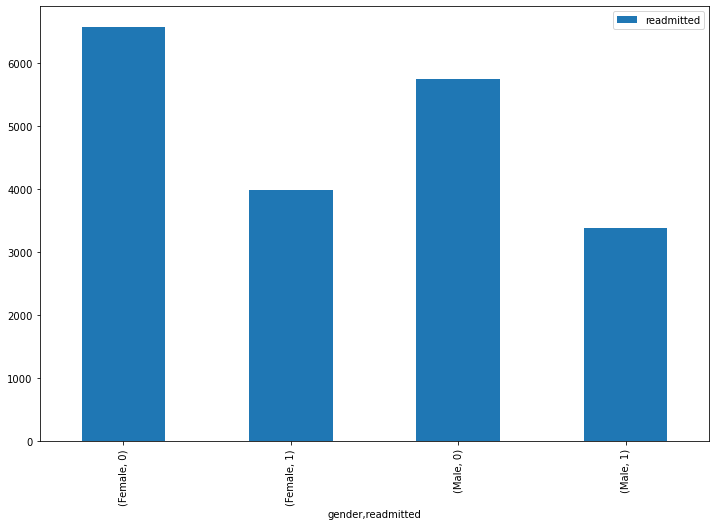

In [241]:
#Gender impact on readmissions

df_13 = pd.DataFrame(df_10.groupby("gender")["readmitted"].value_counts())
df_13.plot.bar(figsize=(12, 8))


In [242]:
#Combining diabetic_data.csv and icd_codes.csv
icdCodes.shape
x = []

for i, row in df_10.iterrows():
  diag = df_10.diag_1[i]
  descRow = icdCodes[(icdCodes['ICD_Code'] == diag)]
  try:
    desc = descRow['Description'].values[0]
    x.append(desc)
  except:
    x.append("None")


df_10['Description'] = x

df_10

<ipython-input-242-ea105d506243>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['Description'] = x


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,Description
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,Up,No,Steady,Ch,Yes,0,Fracture of other and unspecified parts of femur
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,Steady,No,Yes,0,Aftercare involving intermittent dialysis
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,Steady,No,No,No,No,No,No,Yes,0,Duodenal ulcer
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,No,No,No,No,No,Steady,Ch,Yes,0,Other cellulitis and abscess
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,Steady,No,Yes,0,Neoplasm of uncertain behaviour of other and u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101688,443119916,34751961,Caucasian,Male,25,1,1,7,4,SP,...,No,No,No,No,No,Up,Ch,Yes,0,"Diabetes with ketoacidosis, type I [juvenile t..."
101710,443207210,30370995,Other,Female,35,2,1,7,3,MD,...,No,No,No,No,No,Steady,Ch,Yes,0,General symptoms
101716,443237558,93806559,Other,Male,75,2,3,7,8,SP,...,No,No,No,No,No,Down,Ch,Yes,0,Cholelithiasis
101720,443266892,180189752,Caucasian,Male,55,2,1,7,5,BC,...,Up,No,No,Steady,No,Down,Ch,Yes,1,Acute renal failure


In [243]:
count1 = df_10[df_10['readmitted'] == "1"] #All readmitted
count0 = df_10[df_10['readmitted'] == "0"] #All NOT readmitted

In [253]:
#Age impact on readmission rates

# df_age_count1 = count1.groupby('age')['readmitted'].count()
# df_age_count0 = count0.groupby('age')['readmitted'].count()

# df_age_count1.plot.bar(figsize=(12, 8), x = "age", title = "Have been readmitted")
# df_age_count0.plot.bar(figsize=(12, 8), x = "age", title = "Have NOT been readmitted")

In [245]:
#Race impact on readmission rates

# df_race_count1 = count1.groupby('race')['readmitted'].count()
# df_race_count0 = count0.groupby('race')['readmitted'].count()

# df_race_count1.plot.bar(figsize=(12, 8), x = "race", title = "Have been readmitted")
# df_race_count0.plot.bar(figsize=(12, 8), x = "race", title = "Have NOT been readmitted")

In [246]:
#Gender impact on readmission rates

# df_gender_count1 = count1.groupby('gender')['readmitted'].count()
# df_gender_count0 = count0.groupby('gender')['readmitted'].count()

# df_gender_count1.plot.bar(figsize=(12, 8), x = "gender", title = "Have been readmitted")
# df_gender_count0.plot.bar(figsize=(12, 8), x = "gender", title = "Have NOT been readmitted")

In [247]:
#Dianosis impact on readmission rates

# df_diag_1_count1 = count1.groupby('diag_1')['readmitted'].count().reset_index()
# df_diag_1_count0 = count0.groupby('diag_1')['readmitted'].count().reset_index()


# x = df_race_count1['diag_1']
# y = df_race_count1['readmitted']
# plt.figure(figsize=(24, 16))
# plt.scatter(x,y)

# df_diag_1_count1 = count1.groupby('diag_1')['readmitted'].count()
# df_diag_1_count0 = count0.groupby('diag_1')['readmitted'].value_counts()

# x = df_diag_1_count1['diag_1']
# y = df_diag_1_count1['readmitted']

# df_diag_1_count1.plot.bar(figsize=(12,8), x = 'description')

In [248]:
# Model that predicts wheterh a diabetic patient will be readmitted or not

subset_col = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted']
df_10[subset_col]


,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
20446,15,0,0,7,0,72091308,75,58,9,2,0
20737,11,0,0,3,0,72848634,65,59,6,3,0
20824,9,0,0,4,0,73062156,95,56,6,1,0
21083,18,0,0,10,0,73731852,75,68,6,1,0
23879,19,0,0,12,0,81355914,75,77,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
101688,15,0,0,4,0,443119916,25,85,5,0,0
101710,10,0,0,3,0,443207210,35,30,9,1,0
101716,35,0,1,8,0,443237558,75,67,9,3,0
101720,23,0,0,5,0,443266892,55,71,9,5,1
